In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [2]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
# No Null value found
for col in df.columns:    
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))  

Invoice ID - 0.0%
Branch - 0.0%
City - 0.0%
Customer type - 0.0%
Gender - 0.0%
Product line - 0.0%
Unit price - 0.0%
Quantity - 0.0%
Tax 5% - 0.0%
Total - 0.0%
Date - 0.0%
Time - 0.0%
Payment - 0.0%
cogs - 0.0%
gross margin percentage - 0.0%
gross income - 0.0%
Rating - 0.0%


In [5]:
pd.set_option('display.max_row', None)

In [7]:
df.shape

(1000, 17)

In [10]:
df.duplicated.sum() 

0

In [12]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [14]:
#total branches
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
# list of cities
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [17]:
# List of product lines
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [18]:
# Customer type
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
df['Month']=df.Date.dt.month  
df['Day']=df.Date.dt.day

In [34]:
#Grouping 
df.groupby(['Month','Branch'])['Total'].sum().to_frame()

Total
Month Branch            
1     A       38681.1285
      B       37176.0585
      C       40434.6810
2     A       29860.1205
      B       34424.2710
      C       32934.9825
3     A       37659.1215
      B       34597.3425
      C       37199.0430

In [37]:
df.groupby(['Month','Branch'])['Tax 5%', 'gross income'].sum()

C:\ANACONDA\envs\try2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Tax 5%  gross income
Month Branch                         
1     A       1841.9585     1841.9585
      B       1770.2885     1770.2885
      C       1925.4610     1925.4610
2     A       1421.9105     1421.9105
      B       1639.2510     1639.2510
      C       1568.3325     1568.3325
3     A       1793.2915     1793.2915
      B       1647.4925     1647.4925
      C       1771.3830     1771.3830

In [41]:
df.groupby(['Day'])['Total','Tax 5%','gross income'].sum().sort_values(by = 'gross income', ascending = False)

C:\ANACONDA\envs\try2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Total,Tax 5%,gross income
Day,,,
15,15717.4605,748.4505,748.4505
19,14883.2355,708.7255,708.7255
9,13767.2850,655.5850,655.5850
14,13635.3420,649.3020,649.3020
8,13503.7770,643.0370,643.0370
27,13398.1680,638.0080,638.0080
5,12798.6915,609.4615,609.4615
2,12646.7565,602.2265,602.2265
23,12428.8185,591.8485,591.8485


In [44]:
# grouping day and branch to see check sum of Total, Tax5% and gross income
df.groupby(['Day','Branch'])['Total','Tax 5%','gross income'].sum()

C:\ANACONDA\envs\try2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total    Tax 5%  gross income
Day Branch                                   
1   A       3927.4725  187.0225      187.0225
    B       2470.0095  117.6195      117.6195
    C       3426.6015  163.1715      163.1715
2   A       1968.4665   93.7365       93.7365
    B       6344.3415  302.1115      302.1115
    C       4333.9485  206.3785      206.3785
3   A       4469.2830  212.8230      212.8230
    B       3867.9375  184.1875      184.1875
    C       4062.0090  193.4290      193.4290
4   A       4574.4405  217.8305      217.8305
    B       1746.9480   83.1880       83.1880
    C       1636.2360   77.9160       77.9160
5   A       3011.6205  143.4105      143.4105
    B       5016.4065  238.8765      238.8765
    C       4770.6645  227.1745      227.1745
6   A       2766.4875  131.7375      131.7375
    B       4122.7305  196.3205      196.3205
    C       2723.0070  129.6670      129.6670
7   A       3541.2510  168.6310      168.6310
    B       4363.1280  207.7680      207.7680
    C       3596.3340  171.2540      171.2540
8   A       3970.0815  189.0515      189.0515
    B       4056.9585  193.1885      193.1885
    C       5476.7370  260.7970      260.7970
9   A       3580.6050  170.5050      170.5050
    B       4220.1285  200.9585      200.9585
    C       5966.5515  284.1215      284.1215
10  A       3233.3595  153.9695      153.9695
    B       2378.2185  113.2485      113.2485
    C       4253.6235  202.5535      202.5535
11  A       4023.0855  191.5755      191.5755
    B       2331.2625  111.0125      111.0125
    C       3264.0195  155.4295      155.4295
12  A       2909.6130  138.5530      138.5530
    B       5176.8885  246.5185      246.5185
    C       3774.8025  179.7525      179.7525
13  A       2116.6215  100.7915      100.7915
    B       1485.1830   70.7230       70.7230
    C       1847.2440   87.9640       87.9640
14  A       3920.5215  186.6915      186.6915
    B       3965.1780  188.8180      188.8180
    C       5749.6425  273.7925      273.7925
15  A       3674.3280  174.9680      174.9680
    B       7826.9520  372.7120      372.7120
    C       4216.1805  200.7705      200.7705
16  A       2088.1875   99.4375       99.4375
    B       2965.5885  141.2185      141.2185
    C       4893.5460  233.0260      233.0260
17  A       5706.2145  271.7245      271.7245
    B       2294.3235  109.2535      109.2535
    C       2418.0765  115.1465      115.1465
18  A       2481.1920  118.1520      118.1520
    B        760.3890   36.2090       36.2090
    C       2327.7555  110.8455      110.8455
19  A       7209.9405  343.3305      343.3305
    B       1704.0765   81.1465       81.1465
    C       5969.2185  284.2485      284.2485
20  A       5000.4570  238.1170      238.1170
    B       3626.8995  172.7095      172.7095
    C       3192.7140  152.0340      152.0340
21  A       3198.5835  152.3135      152.3135
    B        746.6550   35.5550       35.5550
    C       1718.1150   81.8150       81.8150
22  A       3439.4955  163.7855      163.7855
    B       2726.8395  129.8495      129.8495
    C       1159.8930   55.2330       55.2330
23  A       4418.2635  210.3935      210.3935
    B       1611.1200   76.7200       76.7200
    C       6399.4350  304.7350      304.7350
24  A       3406.6620  162.2220      162.2220
    B       4936.7325  235.0825      235.0825
    C       3258.5805  155.1705      155.1705
25  A       3297.2835  157.0135      157.0135
    B       4517.4885  215.1185      215.1185
    C       3965.7975  188.8475      188.8475
26  A       1758.4455   83.7355       83.7355
    B       5539.8525  263.8025      263.8025
    C       1529.8920   72.8520       72.8520
27  A       5176.6050  246.5050      246.5050
    B       3705.7545  176.4645      176.4645
    C       4515.8085  215.0385      215.0385
28  A       2625.0945  125.0045      125.0045
    B       3720.8010  177.1810      177.1810
    C       2980.2360  141.9160      141.9160
29  A       2502.5280  119.1680      119.1680
    B       30

In [45]:
df.Payment.unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [55]:
#Group by Product line total in decending
df.groupby(['Product line'])['Total'].sum().sort_values(ascending = False).to_frame()

,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


In [56]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8


In [52]:
#Product line quantity as per branch
df.groupby(['Product line','Branch'])['Quantity'].sum().to_frame()

Quantity
Product line           Branch          
Electronic accessories A            322
                       B            316
                       C            333
Fashion accessories    A            263
                       B            297
                       C            342
Food and beverages     A            313
                       B            270
                       C            369
Health and beauty      A            257
                       B            320
                       C            277
Home and lifestyle     A            371
                       B            295
                       C            245
Sports and travel      A            333
                       B            322
                       C            265

In [54]:
#Product line quantity purchase by different gender
df.groupby(['Product line','Gender'])['Quantity'].sum().to_frame()

Quantity
Product line           Gender          
Electronic accessories Female       488
                       Male         483
Fashion accessories    Female       530
                       Male         372
Food and beverages     Female       514
                       Male         438
Health and beauty      Female       343
                       Male         511
Home and lifestyle     Female       498
                       Male         413
Sports and travel      Female       496
                       Male         424

In [60]:
max_rate = df[df['Rating']>9]

In [63]:
#Product line quantity with high rating per branch
max_rate.groupby(['Product line','Branch'])['Quantity'].sum().to_frame()

Quantity
Product line           Branch          
Electronic accessories A             44
                       B             32
                       C             52
Fashion accessories    A             29
                       B             38
                       C             86
Food and beverages     A             60
                       B             28
                       C             65
Health and beauty      A             35
                       B             38
                       C             39
Home and lifestyle     A             56
                       B             36
                       C             22
Sports and travel      A             71
                       B             31
                       C             37

In [65]:
#Product line quantity with high rating
max_rate.groupby(['Product line'])['Quantity'].count().to_frame()

,Quantity
Product line,
Electronic accessories,23
Fashion accessories,31
Food and beverages,28
Health and beauty,23
Home and lifestyle,21
Sports and travel,25


In [71]:
low_rate = df[df['Rating']<5]

In [72]:
#Product line quantity with low rating
low_rate.groupby(['Product line'])['Quantity'].count().to_frame()

,Quantity
Product line,
Electronic accessories,26
Fashion accessories,27
Food and beverages,24
Health and beauty,24
Home and lifestyle,31
Sports and travel,21


In [73]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month,Day
Unit price,1.000000e+00,1.077756e-02,6.339621e-01,6.339621e-01,6.339621e-01,-6.998957e-16,6.339621e-01,-8.777507e-03,-2.738719e-02,5.702090e-02
Quantity,1.077756e-02,1.000000e+00,7.055102e-01,7.055102e-01,7.055102e-01,-3.849075e-16,7.055102e-01,-1.581490e-02,-1.452428e-02,-4.334686e-02
Tax 5%,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02,-2.230134e-02,-2.514770e-03
Total,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.408632e-16,1.000000e+00,-3.644170e-02,-2.230134e-02,-2.514770e-03
cogs,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.439279e-15,1.000000e+00,-3.644170e-02,-2.230134e-02,-2.514770e-03
gross margin percentage,-6.998957e-16,-3.849075e-16,2.461896e-16,2.408632e-16,1.439279e-15,1.000000e+00,2.461896e-16,2.042714e-15,8.935965e-17,-4.999832e-16
gross income,6.339621e-01,7.055102e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.461896e-16,1.000000e+00,-3.644170e-02,-2.230134e-02,-2.514770e-03
Rating,-8.777507e-03,-1.581490e-02,-3.644170e-02,-3.644170e-02,-3.644170e-02,2.042714e-15,-3.644170e-02,1.000000e+00,-4.288037e-02,-7.075821e-03
Month,-2.738719e-02,-1.452428e-02,-2.230134e-02,-2.230134e-02,-2.230134e-02,8.935965e-17,-2.230134e-02,-4.288037e-02,1.000000e+00,-1.189964e-01
Day,5.702090e-02,-4.334686e-02,-2.514770e-03,-2.514770e-03,-2.514770e-03,-4.999832e-16,-2.514770e-03,-7.075821e-03,-1.189964e-01,1.000000e+00


<AxesSubplot:>

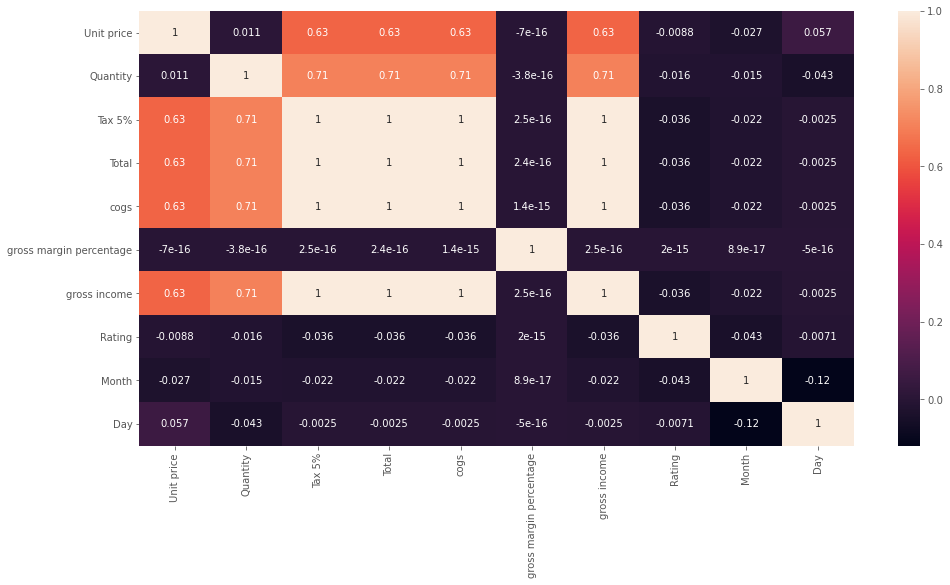

In [77]:
# Corelation Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot =True)

In [78]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8


<AxesSubplot:xlabel='Rating', ylabel='gross income'>

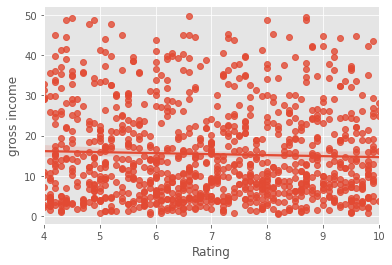

In [80]:
sns.regplot('Rating', 'gross income', data = df)

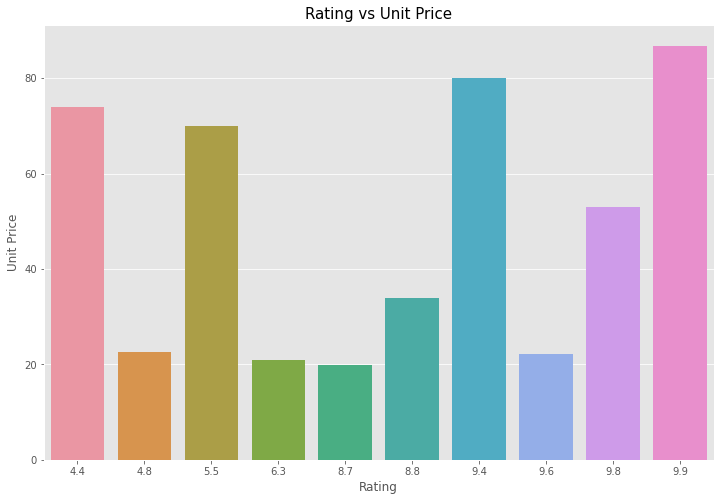

In [84]:
#Bar Plot- Rating Vs Unit Price
plt.figure(figsize=(12,8))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

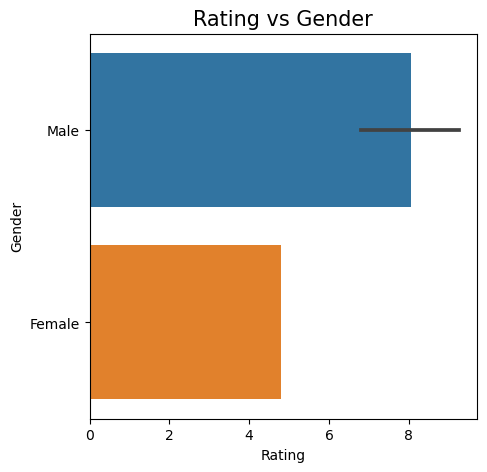

In [85]:
# Bar PLot - Rating Vs Gender
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=df[170:180])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

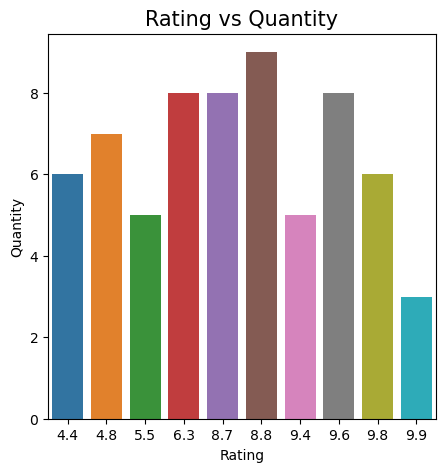

In [86]:
# Bar Plot- Rating Vs Quantity
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()